# Bragisky 1998 / 1999 MR (Magnetic Rossby) waves

In [301]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Class


In [327]:
class SOC:
    # constants
    R_1 = 3480e3  # m
    Omega = 0.729e-4  # /s
    d2r = np.pi / 180  # rad/deg
    s2yr = 3600 * 24 * 365.25  # s

    def __init__(self, m=5, th_0=45, L_th=800e3, H=80e3, N_Omega=2, n=1):
        # SOC propertys
        self.H = H  # m : layer thickness
        self.N = N_Omega * Omega  # /s : SOC buoyancy frequency
        self.B_r = 0.45e-2  # m/s : Magnetic field strength (0.45 cm/s == 5 Gauss)
        self.m=m
        self.th_0=th_0 
        self.L_th=L_th
        self.n=n

    @property
    def Omega_r(self):
        s = self
        Omega_r = SOC.Omega * np.cos(
            s.th_0 * np.pi / 180)  # /s : Coriolis property
        return Omega_r

    @property
    def s_0(self):
        s = self
        s_0 = SOC.R_1 * np.sin(
            s.th_0 * d2r)  # m : longitudinal circumference at latitude
        return s_0

    @property
    def k_th(self):
        s = self
        k_th = np.pi / s.L_th  # /m : latitudinal wavenumber
        return k_th

    @property
    def k_phi(self):
        s = self
        return s.m / self.s_0

    @property
    def k_tau(self):
        # /m : horizontal wavenum (for B gradients)
        k_tau = (self.k_th**2 + self.k_phi**2)**0.5
        return k_tau

    @property
    def L_tau(self):
        return np.pi / self.k_tau

    @property
    def L_H(self):
        return self.H

    @property
    def L_phi(self):
        return np.pi * self.s_0 / m

    @property
    def k_H(self):
        return np.pi / self.L_H

    @property
    def beta(self):
        # /m-s : Coriolis beta-property
        s = self
        beta = 2 * SOC.Omega * np.sin(s.th_0 * SOC.d2r) / SOC.R_1
        return beta

    @property
    def small_ratio(self):
        s = self
        return 0.13 * (5 / s.m)**2

    @property
    def omega_beta(self):
        # /s (35a)
        s = self
        return s.beta * s.k_phi * s.k_H**(-2) * (s.N / (2 * s.Omega_r))**2 / s.n**2

    @property
    def omega_B(self):
        s = self
        return s.k_tau * s.B_r * (s.N / (2 * s.Omega_r))  # /s (35b)

    @property
    def omega_MR(self):
        # /s (39a)
        s = self
        omega_MR = -s.omega_beta - s.omega_B**2 / s.omega_beta
        return omega_MR
        
    @property
    def omega_MR_sr(self):
        # /s (39a)
        s = self
        omega_MR_sr = -s.omega_beta * (1 + s.small_ratio)
        return omega_MR_sr
    
    def _omega2periodyr(self, omega):
        return 2*np.pi/np.abs(omega*s2yr)

    def _print_omega(self, omega, name="omega"):
        periodyr = self._omega2periodyr(omega)
        print(f"{name} = {omega:.2e} /s , period = {periodyr:.2f} yr")
    
    def print_beta(self):
        self._print_omega(self.omega_beta, "omega_beta")

    def print_B(self):
        self._print_omega(self.omega_B, "omega_B")
    
    def print_MR(self):
        self._print_omega(self.omega_MR, "omega_MR")

    def print_MR_sr(self):
        self._print_omega(self.omega_MR_sr, "omega_MR_sr")
        



# Check based on m=5

In [328]:
# Wave propertys
m = 5  # - : longitudinal wavenumber
th_0 = 45  # deg : central latitude of wave
L_th = 10 * H  # m : latitudinal lengthscale of wave motions
w = SOC(m=5, th_0=45, L_th=800e3)
w.print_beta()
w.print_B()
w.print_MR()
w.print_MR_sr()


omega_beta = 7.81e-08 /s , period = 2.55 yr
omega_B = 2.81e-08 /s , period = 7.08 yr
omega_MR = -8.82e-08 /s , period = 2.26 yr
omega_MR_sr = -8.82e-08 /s , period = 2.26 yr


## Verify Braginsky's values

In [329]:
# β ≈ 3.10–11 m–1s–1 (p. 644)
print(f"beta = {w.beta:.3e} /m-s")

beta = 2.963e-11 /m-s


In [330]:
# frequencies 2Ωr ≈ 10–4 s–1 (p. 644)
print(f"2*Omega_r = {2*w.Omega_r:.2e} /s")

2*Omega_r = 1.03e-04 /s


In [331]:
# Let us assume Lθ =10H=8x10^2 km and Lφ =πs0/m= 1.55x10^3(5/m) km (p. 645)
print(f"L_phi/(5/m) = {w.L_phi/(5/w.m)/1e3:.2e} km")

L_phi/(5/m) = 1.55e+03 km


In [332]:
#  s0 = 0.707R1 (p. 645)
print(f"s_0/R_1 = {w.s_0/w.R_1:.4f}")

s_0/R_1 = 0.7071


In [333]:
# For m = 5 we have kθ = 3.9x10–6 m–1, kφ = 2x10–6 m–1, kτ = 4.4x10–6 m–1. (p. 645)
print(f"k_th = {w.k_th:.2e} /m")
print(f"k_phi = {w.k_phi:.2e} /m")
print(f"k_tau = {w.k_tau:.2e} /m")

k_th = 3.93e-06 /m
k_phi = 2.03e-06 /m
k_tau = 4.42e-06 /m


In [334]:
# (N/2Ωr)^2=2 (p. 645)
print(f"(N/2Omega_r)^2 = {(w.N/(2*w.Omega_r))**2:.3f}")

(N/2Omega_r)^2 = 2.000


In [335]:
# we obtain ωβ = 7.8x10–8 s–1 and ωB = 2.8x10–8 s–1; 
# the corresponding periods are 2π/ωβ = 2.6 yr and 2π/ωB = 7.1 yr. (p. 645)
print_omega(w.omega_beta, "omega_beta")
print_omega(w.omega_B, "omega_B")


omega_beta = 7.81e-08 /s , period = 2.55 yr
omega_B = 2.81e-08 /s , period = 7.08 yr


In [336]:
# We use the smallness of the ratio ωB2/ωβ2 = 0.13(5/m)2 to simplify calculations. (p. 645)
print(f"small_ratio = {w.small_ratio:.3f}")

small_ratio = 0.130


In [337]:
# small-scale free MR-waves (m ≥ 5) with corresponding free periods, ~3 yr (p. 648)
print_omega(w.omega_MR, "omega_MR")
print_omega(w.omega_MR_sr, "omega_MR_sr")


omega_MR = -8.82e-08 /s , period = -2.26 yr
omega_MR_sr = -8.82e-08 /s , period = -2.26 yr


# Period Variation with parameters

Text(0.5,1,'MR period variation with N')

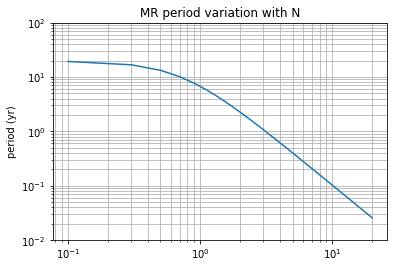

In [396]:
ps = []
Ns = np.linspace(.1, 20, 100)
for N in Ns:
    w = SOC( N_Omega=N)
    ps.append(w._omega2periodyr(w.omega_MR))
plt.loglog(Ns, ps)
plt.ylim(.01,100)
plt.grid(which='both')
plt.ylabel('period (yr)')
plt.title("MR period variation with N")

Text(0.5,1,'MR period variation with th_0')

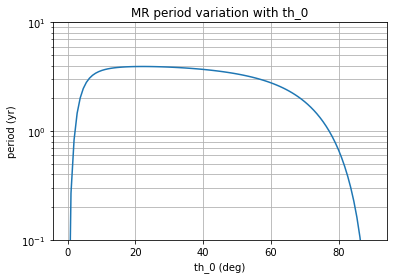

In [397]:
yrs = []
ths = np.linspace(.1, 89.9,100)
for th in ths:
    w = SOC(m=1, th_0=th, L_th=800e3)
    yrs.append(w._omega2periodyr(w.omega_MR))
plt.semilogy(ths,yrs)
plt.ylim(.1,10)
plt.grid(which='both')
plt.ylabel('period (yr)')
plt.xlabel('th_0 (deg)')
plt.title("MR period variation with th_0")

Text(0.5,1,'MR period variation with H')

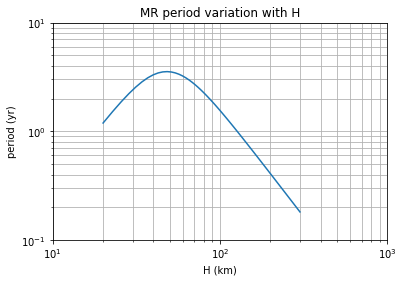

In [398]:
ps = []
Hs = np.linspace(20e3, 300e3,100)
for H in Hs:
    w = SOC(m=5, th_0=45, L_th=800e3, H=H)
    ps.append(w._omega2periodyr(w.omega_MR))
plt.loglog(Hs/1e3,ps)
plt.ylim(.1,10)
plt.xlim(10,1000)
plt.grid(which='both')
plt.ylabel('period (yr)')
plt.xlabel('H (km)')
plt.title("MR period variation with H")

Text(0.5,1,'MR period variation with L_th')

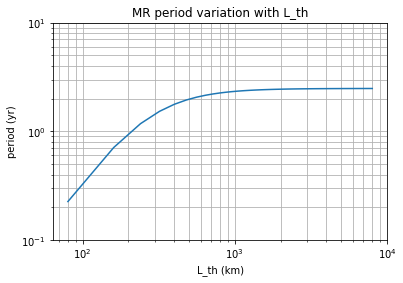

In [399]:
ps = []
lths = np.linspace(80e3, 8000e3,100)
for lth in lths:
    w = SOC(m=5, th_0=45, L_th=lth)
    ps.append(w._omega2periodyr(w.omega_MR))
plt.loglog(lths/1e3,ps)
plt.ylim(.1,10)
plt.grid(which='both')
plt.ylabel('period (yr)')
plt.xlabel('L_th (km)')
plt.title("MR period variation with L_th")

Text(0.5,1,'MR period variation with m')

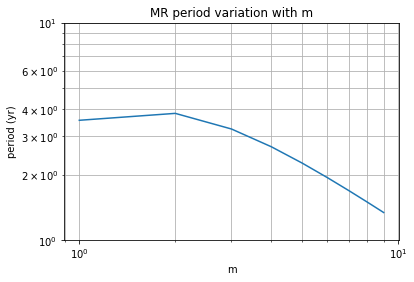

In [400]:
ps = []
ms = range(1,10)
for m in ms:
    w = SOC(m=m, th_0=45, L_th=800e3)
    ps.append(w._omega2periodyr(w.omega_MR))
plt.loglog(ms, ps)
plt.ylim(1,10)
plt.grid(which='both')
plt.ylabel('period (yr)')
plt.xlabel('m')
plt.title("MR period variation with m")

# Extrapolation to m=1,2 
** NOTE: I can't get these to match **

## m=1

In [345]:
# A simple extrapolation of (35a) and (39a) shows that the period ~30 yr 
# may be expected for a global-scale MR- waves, with m ~ 1, 2. 
w = SOC(m=1, th_0=45, L_th=800e3, n=1)
w.print_beta()
w.print_B()
w.print_MR()
w.print_MR_sr()

omega_beta = 1.56e-08 /s , period = 12.75 yr
omega_B = 2.51e-08 /s , period = 7.92 yr
omega_MR = -5.60e-08 /s , period = 3.55 yr
omega_MR_sr = -6.64e-08 /s , period = 3.00 yr


In [346]:
# A simple extrapolation of (35a) and (39a) shows that the period ~30 yr 
# may be expected for a global-scale MR- waves, with m ~ 1, 2. 
w = SOC(m=1, th_0=45, L_th=800e3)
print("\n!!! DOES NOT MATCH !!!\n")
w.print_beta()
w.print_B()
w.print_MR()
w.print_MR_sr()
print("\n!!! DOES NOT MATCH !!!\n")


!!! DOES NOT MATCH !!!

omega_beta = 1.56e-08 /s , period = 12.75 yr
omega_B = 2.51e-08 /s , period = 7.92 yr
omega_MR = -5.60e-08 /s , period = 3.55 yr
omega_MR_sr = -6.64e-08 /s , period = 3.00 yr

!!! DOES NOT MATCH !!!



## m=2

In [350]:
# A simple extrapolation of (35a) and (39a) shows that the period ~30 yr
# may be expected for a global-scale MR- waves, with m ~ 1, 2.
w = SOC(m=2, th_0=45, L_th=800e3)
print("\n!!! DOES NOT MATCH !!!\n")
w.print_beta()
w.print_B()
w.print_MR()
w.print_MR_sr()
print("\n!!! DOES NOT MATCH !!!\n")


!!! DOES NOT MATCH !!!

omega_beta = 3.12e-08 /s , period = 6.38 yr
omega_B = 2.55e-08 /s , period = 7.80 yr
omega_MR = -5.21e-08 /s , period = 3.82 yr
omega_MR_sr = -5.66e-08 /s , period = 3.52 yr

!!! DOES NOT MATCH !!!

